In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [4]:
apple = pd.read_csv(url)

Checking the column types

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Transforming Data column to Datetime type

In [11]:
apple['Date'] = apple['Date'].astype('datetime64[ns]')
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [12]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Checking for duplicate dates

In [15]:
duplicate = apple[apple.duplicated(subset=['Date'])]
duplicate

,Date,Open,High,Low,Close,Volume,Adj Close


Sorting the date from the oldest

In [19]:
apple = apple.sort_values(by='Date')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


Last business day of each month

In [37]:
apple['Month'] = pd.DatetimeIndex(apple.Date).month

In [38]:
apple["Day"] = pd.DatetimeIndex(apple.Date).day

In [39]:
apple.groupby('Month')[['Day']].max()

,Day
Month,
1,31
2,29
3,31
4,30
5,31
6,30
7,31
8,31
9,30


Difference in days between the first day ande the oldest

In [40]:
apple.iloc[8464,0] - apple.iloc[0,0]

Timedelta('12261 days 00:00:00')

No. of months in the data

In [41]:
apple['Month'].count()

8465

Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

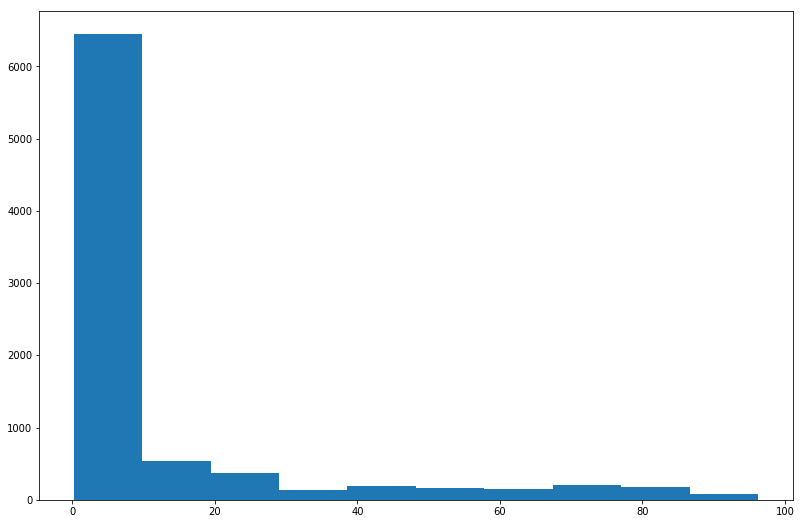

In [43]:
plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])
plt.show()